In [335]:
'''
The purpose of this project is to develop a Machine Learning model that predicts
Bike Demand for a business in Seoul.

>>> Business Request/Case:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.
It is important to make the rental bike available and accessible to the public at the right time as
it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes
becomes a major concern. The crucial part is the prediction of bike count required at each hour
for the stable supply of rental bikes. 

The dataset contains weather information
(Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall),
the number of bikes rented per hour and date information.

>>> Expectations:
A bike-sharing startup has just hired you as their data analyst.
The business is scaling quickly, but the demand fluctuates a lot.
This means that there are not enough usable bikes available on some days, and on other days
there are too many bikes. If the company could predict demand in advance, it could avoid these situations.
The founder of the company has asked you whether you can predict the number of bikes that
will be rented based on information such as predicted weather, the time of year, and the time of day.
You will need to prepare a report that is accessible to a broad audience.
It will need to outline your steps, findings, and conclusions.


'''

'\nThe purpose of this project is to develop a Machine Learning model that predicts\nBike Demand for a business in Seoul.\n\n>>> Business Request/Case:\n\nCurrently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.\nIt is important to make the rental bike available and accessible to the public at the right time as\nit lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes\nbecomes a major concern. The crucial part is the prediction of bike count required at each hour\nfor the stable supply of rental bikes. \n\nThe dataset contains weather information\n(Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall),\nthe number of bikes rented per hour and date information.\n\n>>> Expectations:\nA bike-sharing startup has just hired you as their data analyst.\nThe business is scaling quickly, but the demand fluctuates a lot.\nThis means that there are not enough usable bikes avai

In [336]:
import pandas as pd
import numpy as np

In [374]:
bike_data = pd.read_csv('https://archive.ics.uci.edu/static/public/560/seoul+bike+sharing+demand.zip', encoding='latin1')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [338]:
bike_data.columns = bike_data.columns.str.replace(' ', '_')
bike_data.columns = bike_data.columns.str.lower()

In [339]:
#bike_data = bike_data.sort_values('date', ascending=False).reset_index()
#bike_data = bike_data.rename(columns={'index': 'rev'}).drop(columns='rev')

In [340]:
bike_data['date'] = pd.to_datetime(bike_data['date'], errors='coerce')
bike_data['seasons'] = bike_data['seasons'].map({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4})
bike_data['holiday'] = bike_data['holiday'].map({'Holiday': 1, 'No Holiday': 0})
bike_data['functioning_day'] = bike_data['functioning_day'].map({'Yes': 1, 'No': 0})
bike_data

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,NaT,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,1
8756,NaT,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,1
8757,NaT,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,1
8758,NaT,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,1


In [341]:
bike_data = bike_data[~bike_data['date'].isnull()]
bike_data

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,2018-12-11,1466,19,9.8,46,2.8,1945,-1.2,0.0,0.0,0.0,3,0,1
8324,2018-12-11,1292,20,9.0,48,1.9,1879,-1.4,0.0,0.0,0.0,3,0,1
8325,2018-12-11,1189,21,8.5,50,0.5,1707,-1.3,0.0,0.0,0.0,3,0,1
8326,2018-12-11,1023,22,7.6,55,1.7,1694,-0.8,0.0,0.0,0.0,3,0,1


In [342]:
bike_data

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,2018-12-11,1466,19,9.8,46,2.8,1945,-1.2,0.0,0.0,0.0,3,0,1
8324,2018-12-11,1292,20,9.0,48,1.9,1879,-1.4,0.0,0.0,0.0,3,0,1
8325,2018-12-11,1189,21,8.5,50,0.5,1707,-1.3,0.0,0.0,0.0,3,0,1
8326,2018-12-11,1023,22,7.6,55,1.7,1694,-0.8,0.0,0.0,0.0,3,0,1


In [343]:
'''
Possible features to generate:
(first convert all types here to float)
- day of year sine and cosine encoding 
- hourly sine and cosing encoding
- temperature per hour (temp / 24)
'''

'\nPossible features to generate:\n(first convert all types here to float)\n- day of year sine and cosine encoding \n- hourly sine and cosing encoding\n- temperature per hour (temp / 24)\n'

In [344]:
days_in_year = bike_data['date'].dt.is_leap_year.map({True: 366, False: 365}) # neurotic check for leap years
date_theta = 2 * np.pi * (bike_data['date'].dt.day_of_year - 1) / days_in_year
hours_theta = 2 * np.pi * bike_data['hour'] / 24

In [345]:
bike_data['date_sin'] = np.sin(date_theta)
bike_data['date_cos'] = np.cos(date_theta)
bike_data['hour_sin'] = np.sin(hours_theta)
bike_data['hour_cos'] = np.cos(hours_theta)
bike_data['temp_hour'] = bike_data['temperature(°c)'] / 24
bike_data

/var/folders/lc/x5lgkj591sb74r0q10tqtmj40000gq/T/ipykernel_88442/2771995820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['date_sin'] = np.sin(date_theta)
/var/folders/lc/x5lgkj591sb74r0q10tqtmj40000gq/T/ipykernel_88442/2771995820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['date_cos'] = np.cos(date_theta)
/var/folders/lc/x5lgkj591sb74r0q10tqtmj40000gq/T/ipykernel_88442/2771995820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,date_sin,date_cos,hour_sin,hour_cos,temp_hour
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1,0.188227,0.982126,0.000000,1.000000,-0.216667
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1,0.188227,0.982126,0.258819,0.965926,-0.229167
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1,0.188227,0.982126,0.500000,0.866025,-0.250000
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1,0.188227,0.982126,0.707107,0.707107,-0.258333
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1,0.188227,0.982126,0.866025,0.500000,-0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,2018-12-11,1466,19,9.8,46,2.8,1945,-1.2,0.0,0.0,0.0,3,0,1,-0.353676,0.935368,-0.965926,0.258819,0.408333
8324,2018-12-11,1292,20,9.0,48,1.9,1879,-1.4,0.0,0.0,0.0,3,0,1,-0.353676,0.935368,-0.866025,0.500000,0.375000
8325,2018-12-11,1189,21,8.5,50,0.5,1707,-1.3,0.0,0.0,0.0,3,0,1,-0.353676,0.935368,-0.707107,0.707107,0.354167
8326,2018-12-11,1023,22,7.6,55,1.7,1694,-0.8,0.0,0.0,0.0,3,0,1,-0.353676,0.935368,-0.500000,0.866025,0.316667


In [346]:
'''
Extra features to add
- three lagging rented bike count features: previous day, two days and three days before present day (base of trend, if at all, kind of like an EMA)
- rolling rented bike count (so as to build a lagging indicator)

We will assume rented_bike_count = rbc, for the sake of space
'''

'\nExtra features to add\n- three lagging rented bike count features: previous day, two days and three days before present day (base of trend, if at all, kind of like an EMA)\n- rolling rented bike count (so as to build a lagging indicator)\n\nWe will assume rented_bike_count = rbc, for the sake of space\n'

In [347]:
bike_data['rbc_1'] = bike_data['rented_bike_count'].shift(1) # shifts by 1 day
bike_data['rbc_2'] = bike_data['rented_bike_count'].shift(2) # shifts by 2 days
bike_data['rbc_3'] = bike_data['rented_bike_count'].shift(3) # shifts by 3 days
bike_data['rbc_rolling_mean'] = bike_data['rented_bike_count'].shift(1).rolling(window=7).mean() # this is to smoothen the data
bike_data['rbc_rolling_std'] = bike_data['rented_bike_count'].shift(1).rolling(window=7).std() # this is to account for variance in trend, if at all
bike_data['rbc_trend'] = bike_data['rented_bike_count'].rolling(3).apply(lambda x: x.iloc[-1] - x.iloc[0])
# the rolling is using a window of 3 because the rbc features are using past 72-hour windows
# to build the trend momentum. ideally I should use a 7-day but since that variance has been covered with the rollingd_std
# and there's a mean to smoothen any sharp spikes, leaving it as three allows it to work with any budding trend
# whether it is an increase, decrease or steadying of demand

/var/folders/lc/x5lgkj591sb74r0q10tqtmj40000gq/T/ipykernel_88442/2714927823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['rbc_1'] = bike_data['rented_bike_count'].shift(1) # shifts by 1 day
/var/folders/lc/x5lgkj591sb74r0q10tqtmj40000gq/T/ipykernel_88442/2714927823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['rbc_2'] = bike_data['rented_bike_count'].shift(2) # shifts by 2 days
/var/folders/lc/x5lgkj591sb74r0q10tqtmj40000gq/T/ipykernel_88442/2714927823.py:3: SettingWithCopy

In [348]:
bike_data = bike_data.dropna().reset_index(drop=True)
bike_data_num = bike_data.select_dtypes(include=np.number)

In [349]:
bike_data

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),...,date_cos,hour_sin,hour_cos,temp_hour,rbc_1,rbc_2,rbc_3,rbc_rolling_mean,rbc_rolling_std,rbc_trend
0,2017-01-12,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,...,0.982126,0.965926,-0.258819,-0.308333,181.0,100.0,78.0,156.714286,63.821925,360.0
1,2017-01-12,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,...,0.982126,0.866025,-0.500000,-0.316667,460.0,181.0,100.0,186.142857,129.675786,749.0
2,2017-01-12,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,...,0.982126,0.707107,-0.707107,-0.270833,930.0,460.0,181.0,289.857143,310.537936,30.0
3,2017-01-12,339,10,-3.5,24,1.2,1996,-21.2,0.65,0.0,...,0.982126,0.500000,-0.866025,-0.145833,490.0,930.0,460.0,335.142857,313.753846,-591.0
4,2017-01-12,360,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,...,0.982126,0.258819,-0.965926,-0.020833,339.0,490.0,930.0,368.285714,297.468606,-130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,2018-12-11,1466,19,9.8,46,2.8,1945,-1.2,0.00,0.0,...,0.935368,-0.965926,0.258819,0.408333,2022.0,1472.0,1193.0,1204.857143,419.457757,-6.0
3445,2018-12-11,1292,20,9.0,48,1.9,1879,-1.4,0.00,0.0,...,0.935368,-0.866025,0.500000,0.375000,1466.0,2022.0,1472.0,1287.428571,403.265776,-730.0
3446,2018-12-11,1189,21,8.5,50,0.5,1707,-1.3,0.00,0.0,...,0.935368,-0.707107,0.707107,0.354167,1292.0,1466.0,2022.0,1345.000000,363.733877,-277.0
3447,2018-12-11,1023,22,7.6,55,1.7,1694,-0.8,0.00,0.0,...,0.935368,-0.500000,0.866025,0.316667,1189.0,1292.0,1466.0,1388.285714,314.736246,-269.0


In [350]:
throwaways = bike_data_num.drop(columns=['seasons', 'holiday', 'functioning_day'], inplace=True)

In [351]:
bike_data_num.columns

Index(['rented_bike_count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'date_sin',
       'date_cos', 'hour_sin', 'hour_cos', 'temp_hour', 'rbc_1', 'rbc_2',
       'rbc_3', 'rbc_rolling_mean', 'rbc_rolling_std', 'rbc_trend'],
      dtype='object')

In [352]:
feature_col = [
    'hour', 'temperature(°c)','humidity(%)',
    'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)',
    'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'date_sin', 'date_cos', 'hour_sin',
    'hour_cos', 'temp_hour', 'rbc_1', 'rbc_2', 'rbc_3', 'rbc_rolling_mean',
    'rbc_rolling_std', 'rbc_trend']

target = 'rented_bike_count'

bike_feature = bike_data_num[feature_col]
bike_label = bike_data_num[target]

split = int(len(bike_data_num) * 0.7)

In [353]:
feature_train = bike_feature.iloc[:split]
feature_test = bike_feature.iloc[split:]

label_train = bike_label.iloc[:split]
label_test = bike_label.iloc[split:]

In [354]:
label_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1035 entries, 2414 to 3448
Series name: rented_bike_count
Non-Null Count  Dtype
--------------  -----
1035 non-null   int64
dtypes: int64(1)
memory usage: 8.2 KB


In [355]:
import tensorflow as tf

SEED_VALUE = 42
 
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [356]:
import keras

def build_model(n_features):
    model = keras.Sequential()
    model.add(keras.layers.Dense(32, activation='gelu', input_shape = (n_features,)))
    #model.add(keras.layers.Dense(64, activation='gelu'))
    model.add(keras.layers.Dense(16, activation='gelu'))
    model.add(keras.layers.Dense(1))
    
    optimizer = keras.optimizers.Adam(learning_rate=0.002)
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mse', 'mae'])
    
    return model

In [357]:
bike_model = build_model(len(feature_col))
history = bike_model.fit(feature_train, label_train, epochs=500, batch_size=1024, validation_split=0.1, verbose=0, shuffle=False, callbacks=keras.callbacks.EarlyStopping(patience=40))

/Users/kaluarunsi/Desktop/ml_projects/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


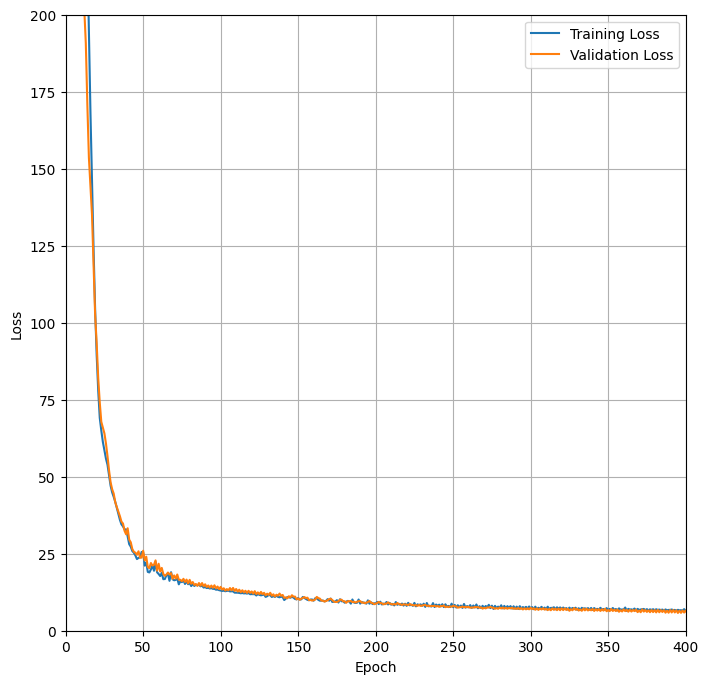

In [358]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlim([0, 400])
plt.ylim([0, 200])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [359]:
from sklearn.metrics import r2_score

label_pred = bike_model.predict(feature_test).flatten()
r2 = r2_score(label_test, label_pred) * 100
scores = bike_model.evaluate(feature_test, label_test, verbose = 1)


print('r2 score: ', r2)
print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6826 - mae: 5.6826 - mse: 78.3685 
r2 score:  99.98076558113098
Mean Squared Error :  91.55783081054688
Mean Absolute Error :  5.775653839111328


In [360]:
results = pd.DataFrame({
    'actual': label_test.values,
    'predicted': label_pred.round()})

results['diff'] = (results['predicted'] - results['actual']).round()

results

,actual,predicted,diff
0,1465,1467.0,2.0
1,1286,1286.0,0.0
2,942,954.0,12.0
3,707,711.0,4.0
4,455,457.0,2.0
...,...,...,...
1030,1466,1463.0,-3.0
1031,1292,1295.0,3.0
1032,1189,1179.0,-10.0
1033,1023,1016.0,-7.0


In [361]:
SEED = 10

seed_range = []
# Fix seed to make training deterministic.
for s in range(1, SEED+1):
    seed_range.append(s)

seed_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [362]:
feature_test[-1:]

,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),date_sin,date_cos,hour_sin,hour_cos,temp_hour,rbc_1,rbc_2,rbc_3,rbc_rolling_mean,rbc_rolling_std,rbc_trend
3448,23,6.9,60,0.8,1610,-0.3,0.0,0.0,0.0,-0.353676,0.935368,-0.258819,0.965926,0.2875,1023.0,1189.0,1292.0,1379.571429,325.234714,-487.0


In [363]:
def future_prediction(seed):
    ensemble_model = build_model(feature_train.shape[1])
    history = ensemble_model.fit(
        feature_train, label_train,
        validation_split=0.1, epochs=500,
        batch_size=1024, verbose=0, shuffle=False,
        callbacks=[keras.callbacks.EarlyStopping(patience=40, restore_best_weights=False)]
    )
    
    return ensemble_model, ensemble_model.predict(feature_test[-1:]).flatten(), history

In [364]:
m, pred, h = future_prediction(3)

/Users/kaluarunsi/Desktop/ml_projects/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [365]:
pred

array([714.4728], dtype=float32)

In [366]:
next_pred = pred[-1]
next_pred

np.float32(714.4728)

In [367]:
'''
Create a custom function that takes in data from the weather API or wherever for the next day's feature columns, and it will feed that into the model for a prediction
OR
We use the average feature values per hour 0-23 as the new values for the future column, such that
 'hour', - past hour + 1, if hour == 23, next_hour == 0 else next_hour == hour + 1
 'temperature(°c)', - group all by the agg mean of that next_hour
 'humidity(%)', - group all by the agg mean of that next_hour
 'wind_speed_(m/s)', - group all by the agg mean of that next_hour
 'visibility_(10m)', - group all by the agg mean of that next_hour
 'dew_point_temperature(°c)', - group all by the agg mean of that next_hour
 'solar_radiation_(mj/m2)', - group all by the agg mean of that next_hour
 'rainfall(mm)', - group all by the agg mean of that next_hour
 'snowfall_(cm)', - group all by the agg mean of that next_hour
 'seasons', - group all by the agg mean of that next_hour
 'holiday', - group all by the agg mean of that next_hour
 'functioning_day', - group all by the agg mean of that next_hour
 'date', - next day of the last day on the original bike_data df
 'date_sin', - sine next day of the last day on the original bike_data df
 'date_cos', - cosine next day of the last day on the original bike_data df
 'hour_sin', - sine of next_hour
 'hour_cos', - cosine of next_hour
 'temp_hour', - temp_mean * hour
 'rbc_1', - rbc_actual of last row
 'rbc_2', - rbc_actual of two rows before
 'rbc_3', - rbc_actual of three rows before
 'rbc_rolling_mean', - shift and rolling mean of past three rbcs, window of 7
 'rbc_rolling_std', - shift and rolling std of past three rbcs, window of 7
 'rbc_trend' - rolling lambda of rbc_actual, window of 3
 
 make a copy of bike_data before numeric, and then insert these new row values using pd.concat into the selected columns
'''

"\nCreate a custom function that takes in data from the weather API or wherever for the next day's feature columns, and it will feed that into the model for a prediction\nOR\nWe use the average feature values per hour 0-23 as the new values for the future column, such that\n 'hour', - past hour + 1, if hour == 23, next_hour == 0 else next_hour == hour + 1\n 'temperature(°c)', - group all by the agg mean of that next_hour\n 'humidity(%)', - group all by the agg mean of that next_hour\n 'wind_speed_(m/s)', - group all by the agg mean of that next_hour\n 'visibility_(10m)', - group all by the agg mean of that next_hour\n 'dew_point_temperature(°c)', - group all by the agg mean of that next_hour\n 'solar_radiation_(mj/m2)', - group all by the agg mean of that next_hour\n 'rainfall(mm)', - group all by the agg mean of that next_hour\n 'snowfall_(cm)', - group all by the agg mean of that next_hour\n 'seasons', - group all by the agg mean of that next_hour\n 'holiday', - group all by the agg 

In [368]:
bike_data_copy = bike_data.copy()
remove_col = bike_data_copy.drop(columns=['seasons', 'holiday', 'functioning_day'], inplace=True)
bike_data_copy.head(5)

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),...,date_cos,hour_sin,hour_cos,temp_hour,rbc_1,rbc_2,rbc_3,rbc_rolling_mean,rbc_rolling_std,rbc_trend
0,2017-01-12,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,...,0.982126,0.965926,-0.258819,-0.308333,181.0,100.0,78.0,156.714286,63.821925,360.0
1,2017-01-12,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,...,0.982126,0.866025,-0.500000,-0.316667,460.0,181.0,100.0,186.142857,129.675786,749.0
2,2017-01-12,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,...,0.982126,0.707107,-0.707107,-0.270833,930.0,460.0,181.0,289.857143,310.537936,30.0
3,2017-01-12,339,10,-3.5,24,1.2,1996,-21.2,0.65,0.0,...,0.982126,0.500000,-0.866025,-0.145833,490.0,930.0,460.0,335.142857,313.753846,-591.0
4,2017-01-12,360,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,...,0.982126,0.258819,-0.965926,-0.020833,339.0,490.0,930.0,368.285714,297.468606,-130.0


In [369]:
from datetime import timedelta

In [370]:
next_hour = 0 if bike_data_copy['hour'].iloc[-1] + 1 > 23 else bike_data_copy['hour'].iloc[-1] + 1
next_date = bike_data_copy['date'].iloc[-1] + timedelta(1)
next_date

Timestamp('2018-12-12 00:00:00')

In [371]:
agg_data = bike_data_copy.loc[bike_data_copy['hour'] == next_hour]

In [372]:
agg_temperature = agg_data['hour'].mean()
agg_humidity = agg_data['humidity(%)'].mean()
agg_wind_speed = agg_data['wind_speed_(m/s)'].mean() # agg_data[].mean()
agg_visibility = agg_data['visibility_(10m)'].mean()
agg_dew_point_temperature = agg_data['dew_point_temperature(°c)'].mean()
agg_solar_radiation = agg_data['solar_radiation_(mj/m2)'].mean()
agg_rainfall = agg_data['rainfall(mm)'].mean()
agg_snowfall = agg_data['snowfall_(cm)'].mean()